In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
data = pd.read_csv('/Users/prof.lock/Desktop/Data Science/data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [4]:
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


# Data Cleaning

In [5]:
data[data.columns[data.isna().any()]].isna().sum()

Club                         241
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
                            ... 
GKHandling                    48
GKKicking                     48
GKPositioning                 48
GKReflexes                    48
Release Clause              1564
Length: 76, dtype: int64

In [6]:
data.drop(data[data['Stamina'].isna()].index.tolist(),inplace = True)

In [7]:
columns = ['Unnamed: 0','Photo','Flag','Club Logo','Release Clause','Nationality','ID','Club']
try:
    data.drop(data.columns[18:54],axis=1,inplace=True)
    data.drop(columns,axis=1,inplace=True)
except Exception as e:
    print(e)

In [8]:
replace = lambda x: re.sub("[€MK]","",x)

In [9]:
data['Wage'] = data['Wage'].apply(replace).astype("float")
data['Value'] = data['Value'].apply(replace).astype("float")

# Data Analysis

## Best Player in Various Aspects?

In [10]:
best_players = pd.DataFrame()
columns = data.columns.tolist()
columns.remove("Preferred Foot")
columns.remove("Name")
for column in columns:
    try:
        best_players= best_players.append(pd.DataFrame({"Name":data.loc[data[column].idxmax()]['Name'],"Score":data[column].max()},index=[column]))
    except Exception as e:
        print(e)

In [11]:
best_players.drop(['Special','Weak Foot','International Reputation','Age','Wage','Value'],axis=0)

,Name,Score
Overall,L. Messi,94.0
Potential,K. Mbappé,95.0
Skill Moves,Cristiano Ronaldo,5.0
Crossing,K. De Bruyne,93.0
Finishing,L. Messi,95.0
HeadingAccuracy,Naldo,94.0
ShortPassing,L. Modrić,93.0
Volleys,E. Cavani,90.0
Dribbling,L. Messi,97.0
Curve,Quaresma,94.0


# Most Preferred Foot?

Text(0.5, 1.0, 'Most Preferred Foot of the Players')

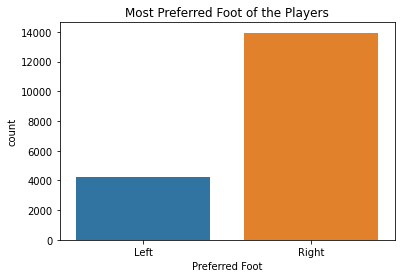

In [12]:
sns.countplot(data['Preferred Foot'])
plt.title('Most Preferred Foot of the Players')

## Does Age have an Impact on Potential?

Text(0.5, 1.0, 'Age vs Potential')

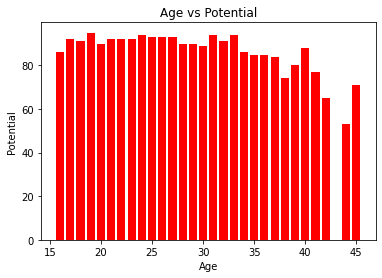

In [13]:
plt.bar(data['Age'],data['Potential'],color='red')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.title("Age vs Potential")

# Modelling to predict Overall

In [14]:
data.drop(['Name'],axis=1,inplace=True)

Text(0.5, 1.0, 'Overall correlation to Performance indicators')

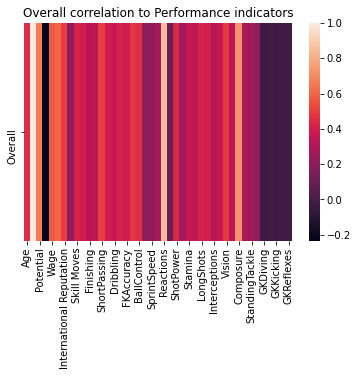

In [15]:
sns.heatmap(data.corr().loc[['Overall'],:]).set_title("Overall correlation to Performance indicators")

In [16]:
data = pd.get_dummies(data)

In [17]:
X = data.drop(['Overall'],axis=1)
y = data[['Overall']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

In [18]:
lm = LinearRegression(normalize=True)
lm.fit(X_train,y_train)

LinearRegression(normalize=True)

In [19]:
y_pred = lm.predict(X_test)

In [20]:
score = r2_score(y_test,y_pred)
print(score)

0.9308032151252896


# Evaluation of RandomForestRegressor, DecisionTreeRegressor, Linear Regression and KNearestNeighbors

In [21]:
def evaluation(clf,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test):
    print('\nModel : {}'.format(clf))
    
    clf.fit(X_train,y_train.values.ravel())
    y_pred =clf.predict(X_test)
    
    try:
        print('MSE : {}'.format(mean_squared_error(y_test,y_pred)))
        print('MAE : {}'.format(mean_absolute_error(y_test,y_pred)))
        print('R2 : {}'.format(r2_score(y_test,y_pred)))
    except Exception as e:
        print(e)

In [22]:
knn = KNeighborsRegressor(n_neighbors=7)
dt =  DecisionTreeRegressor(max_depth=7)
rf = RandomForestRegressor(max_depth=7)
lr = LinearRegression(normalize=True)

In [23]:
models = [knn,dt,rf,lr]
for i in models:
    evaluation(i)


Model : KNeighborsRegressor(n_neighbors=7)
MSE : 2.6967057748209413
MAE : 1.1889815397524648
R2 : 0.9429911957194479

Model : DecisionTreeRegressor(max_depth=7)
MSE : 1.019926417124364
MAE : 0.7356166477335592
R2 : 0.978438587539915

Model : RandomForestRegressor(max_depth=7)
MSE : 0.6252848181067535
MAE : 0.5558401703010556
R2 : 0.9867813759484327

Model : LinearRegression(normalize=True)
MSE : 3.2732377345148342
MAE : 1.4237673936428108
R2 : 0.9308032151252896
